In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
# is this the correct step?
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

2016-08-23


Text(0, 0.5, 'Inches')

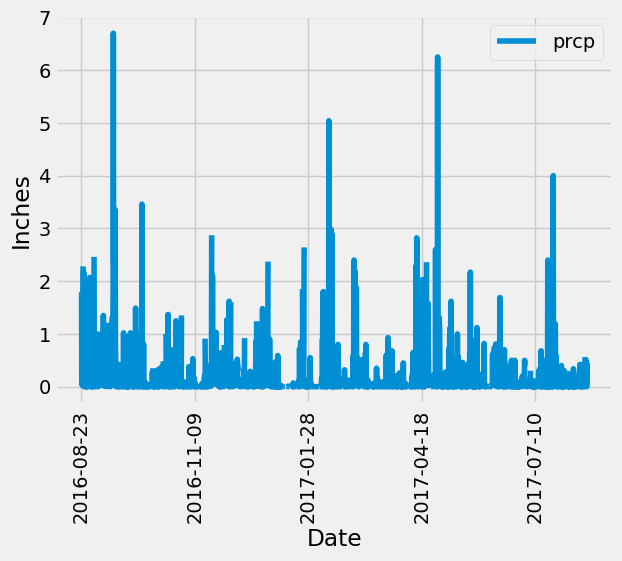

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_2016 = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
date_2016
print(date_2016)

# Perform a query to retrieve the data and precipitation scores

data_2016_17 = session.query(measurement.date, measurement.prcp).filter(measurement.date >= date_2016).all()
   

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df_2016_17 = pd.DataFrame(data_2016_17, columns=['date', 'prcp'])
df_2016_17

# Sort the dataframe by date
data_2016_17 = df_2016_17.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data - example from day 3.3 activity

data_2016_17.plot(x='date', y='prcp', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")


In [11]:
df_2016_17 = pd.DataFrame(data_2016_17, columns=['date', 'prcp'])
df_2016_17

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_2016_17.describe()

# Create a DataFrame using a dictionary with summary_labels as keys and summary_values as values
summary_table = df_2016_17.describe()
summary_table

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station).label('count')).\
                          group_by(measurement.station).\
                          order_by(func.count(measurement.station).desc()).all()


most_active = session.query(measurement.station, func.count(measurement.station).label('count')).\
                          group_by(measurement.station).\
                          order_by(func.count(measurement.station).desc()).first()

print('The most active station is', most_active, '.')
station_activity

The most active station is ('USC00519281', 2772) .


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'

min_max_avg_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                filter(measurement.station == most_active_station).all()

min_max_avg_temp

[(54.0, 85.0, 71.66378066378067)]

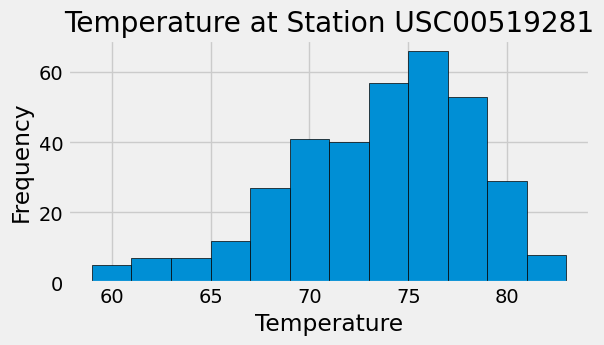

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_2016_17 = session.query(measurement.station, measurement.tobs).\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.station == most_active_station).all()

temp_2016_17 = pd.DataFrame(temp_2016_17, columns=['date','tobs'])
temp_2016_17

plt.figure(figsize=(6, 3))
plt.hist(temp_2016_17['tobs'], bins=12, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature at Station {most_active_station}')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()